# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(ggrepel))
library(svglite)
library(RColorBrewer)




[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

In [2]:
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))

In [3]:
#AvailableData()

# Read objects merged_unprocessed_db_filt_clustered_QCed

In [5]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [6]:
adata<-readRDS(file="merged_clusters_final_with_peak_subset.rds")

# merged_clusters_final.rds

In [7]:
adata

An object of class Seurat 
970987 features across 16849 samples within 6 assays 
Active assay: ATAC_by_Construction_annotation (268121 features, 0 variable features)
 2 layers present: counts, data
 5 other assays present: RNA, RNA_raw, ATAC, SCT, peak_subset
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

# Final_graphs path

In [8]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/",'Final_graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

## Graph WNN by SampleID

png 
  2

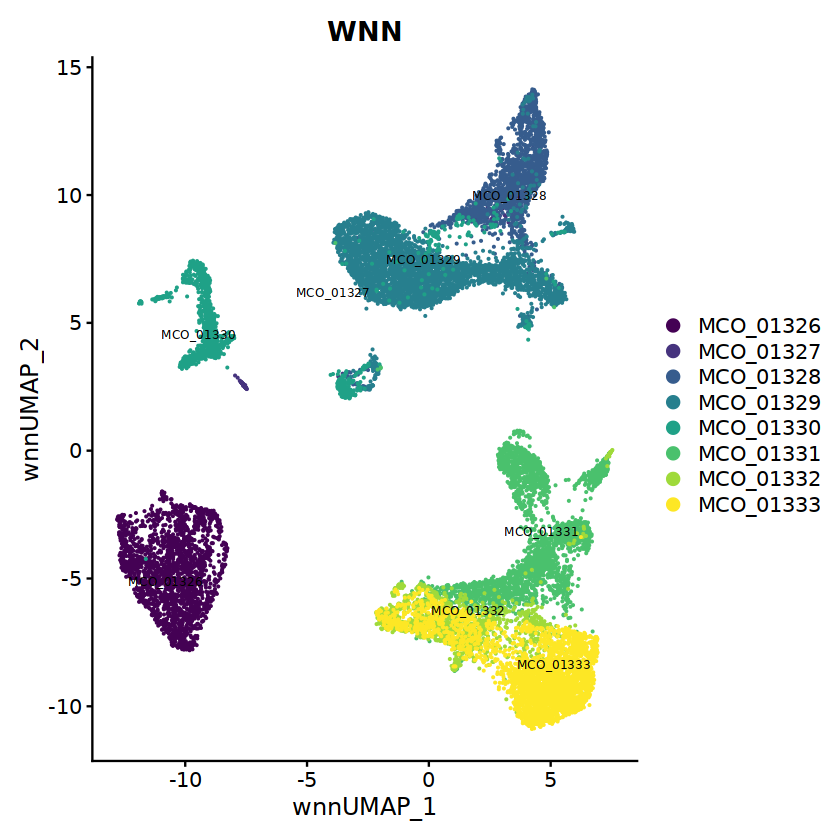

In [9]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by Seurat cluster

png 
  2

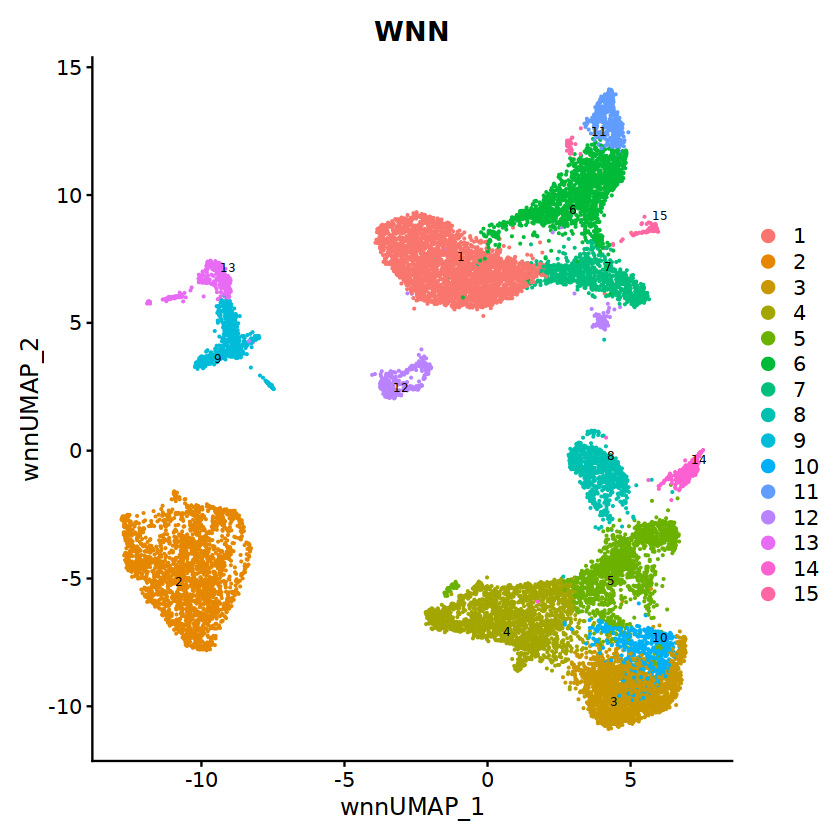

In [10]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## WNN by Construction_annotation

In [11]:
levels(adata@meta.data$Construction_annotation)

length(levels(adata@meta.data$Construction_annotation))

[1] "hESC"                        "HemogenicEndothelium"       
 [3] "Endoderm"                    "MEP"                        
 [5] "early erythroid"             "mid erythroid"              
 [7] "late erythroid"              "early MK"                   
 [9] "MK"                          "Classical monocytes"        
[11] "Mast cells"                  "Double-negative thymocytes" 
[13] "gamma-delta T cells"         "ILC3"                       
[15] "Regulatory T cells"          "Tem/Effector helper T cells"
[17] "Type 17 helper T cells"      "CD16- NK cells"             
[19] "NK cells"                    "Plasmablasts"               
[21] "unassigned"

[1] 21

In [12]:
vector_colors<-c('#E41A1C','#377EB8','#8DD3C7','#4DAF4A','#984EA3','#FF7F00','#FFFF33','#F781BF','yellowgreen','#C7E9C0','#08519C','#FB6A4A','#EF3B2C','#CB181D','#A50F15','#67000D','#FFF5F0',
                '#FDAE6B','#D94801','#FCBBA1','gray')

str(vector_colors)
cat("\n")

names(vector_colors)<-levels(adata@meta.data$Construction_annotation)

str(vector_colors)
cat("\n")

 chr [1:21] "#E41A1C" "#377EB8" "#8DD3C7" "#4DAF4A" "#984EA3" "#FF7F00" ...

 Named chr [1:21] "#E41A1C" "#377EB8" "#8DD3C7" "#4DAF4A" "#984EA3" ...
 - attr(*, "names")= chr [1:21] "hESC" "HemogenicEndothelium" "Endoderm" "MEP" ...



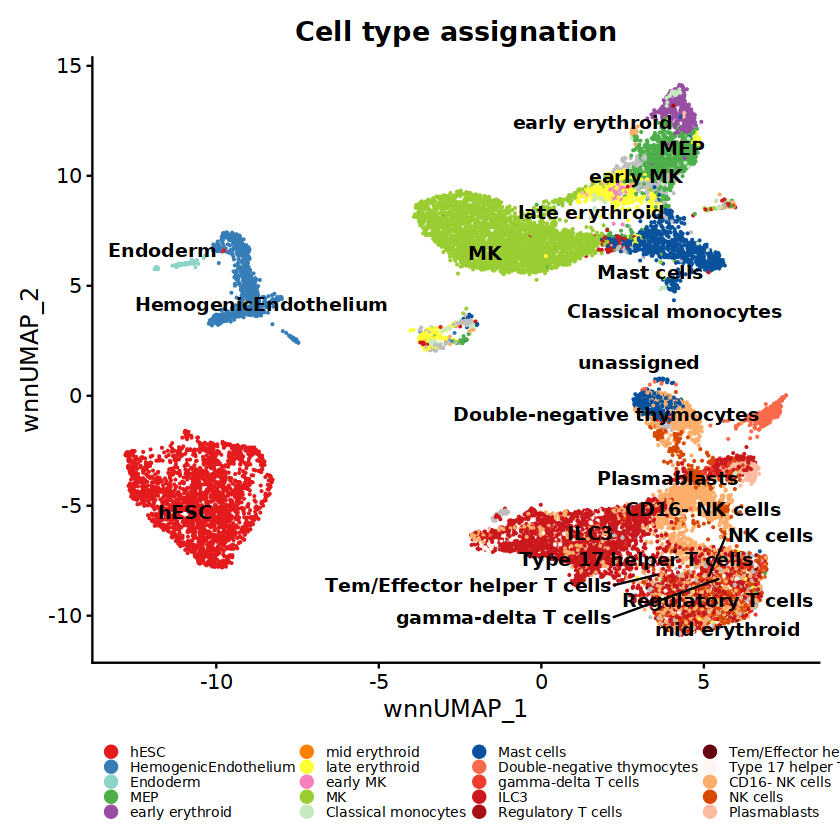

In [61]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "Construction_annotation", label = FALSE, cols=vector_colors) 

p3<-LabelClusters(p3, id = "Construction_annotation",  fontface = "bold", color = "black")+
ggtitle("Cell type assignation")+
theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))

p3


In [63]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_Construction_annotation.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


png 
  2

## WNN markers

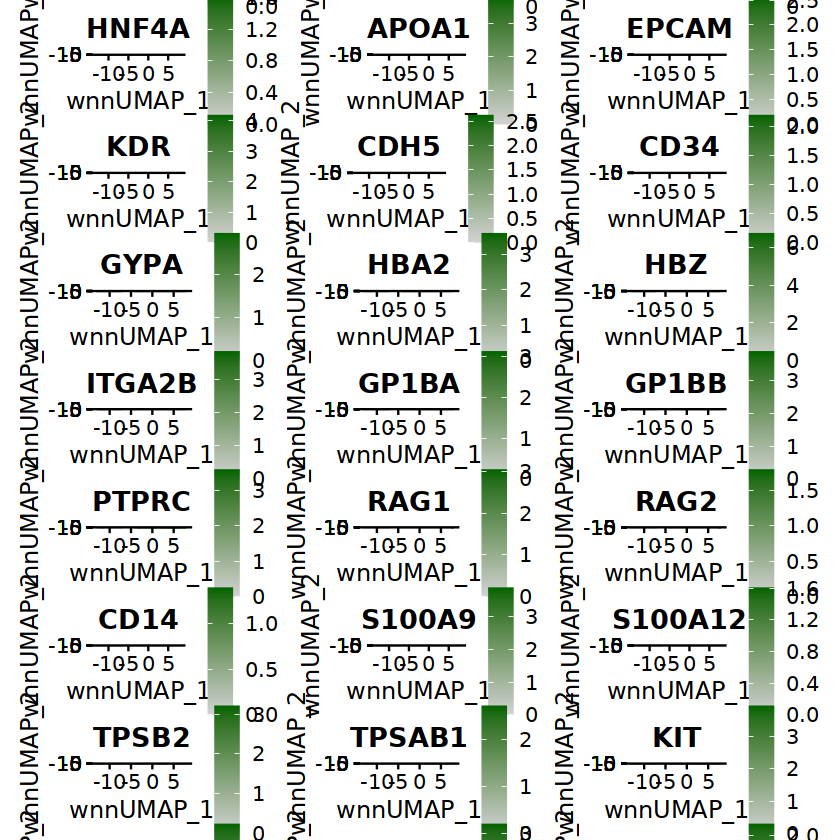

In [15]:
## Graph 

DefaultAssay(adata) <- 'SCT'


p5 <- FeaturePlot(adata, features = c('SOX2','SOX4','POU5F1'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

pEndoderm <- FeaturePlot(adata, features = c("HNF4A",'APOA1','EPCAM'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

p5_B <- FeaturePlot(adata, features = c("KDR",'CDH5','CD34'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)
p5_1 <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(adata, features = c('PTPRC','RAG1','RAG2'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_8 <- FeaturePlot(adata, features = c('CD14','S100A9','S100A12'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_9 <- FeaturePlot(adata, features = c('TPSB2','TPSAB1','KIT'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_10 <- FeaturePlot(adata, features = c('NCAM1','NKG7','FCGR3A'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5 / pEndoderm / p5_B / p5_1 / p5_3 / p_7 / p_8/ p_9 / p_10

In [16]:
setwd(path_graphs)
png(file='WNN_marker_genes.png', width =1000, height = 2250)
p5 / pEndoderm / p5_B / p5_1 / p5_3 / p_7 / p_8/ p_9 / p_10
dev.off()

png 
  2

# Define marker genes

In [17]:
markers<-c('SOX2','SOX4','POU5F1',"HNF4A","APOA1","EPCAM","KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

In [18]:
length(markers)

[1] 30

## Dotplot

png 
  2

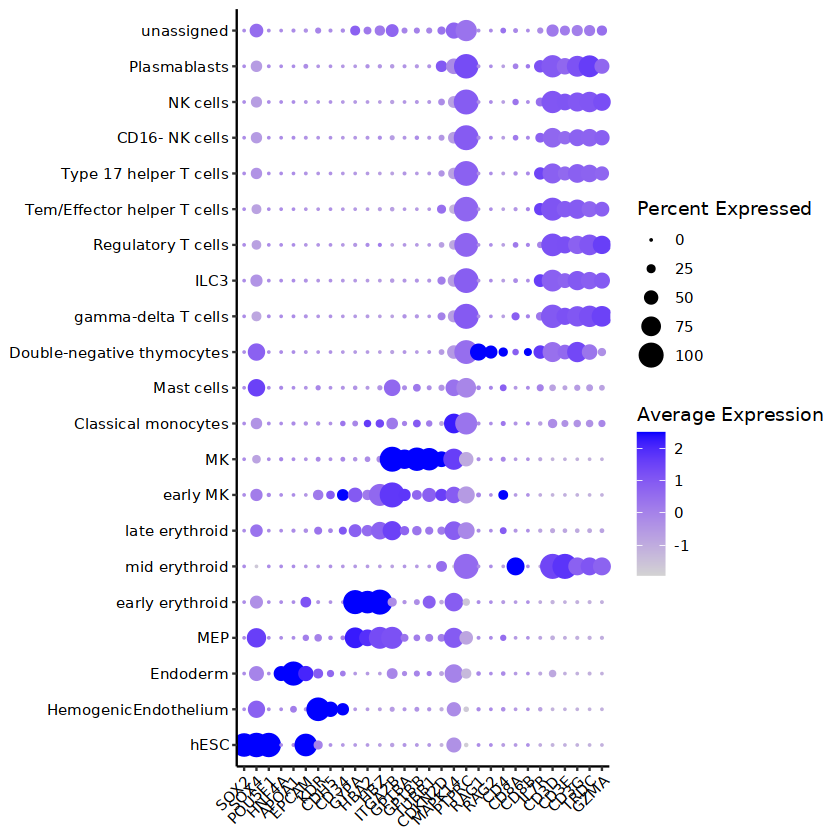

In [19]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="Construction_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Construction_annotation.png', width =1000)
dotplot3
dev.off()

# New markers

In [20]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

png 
  2

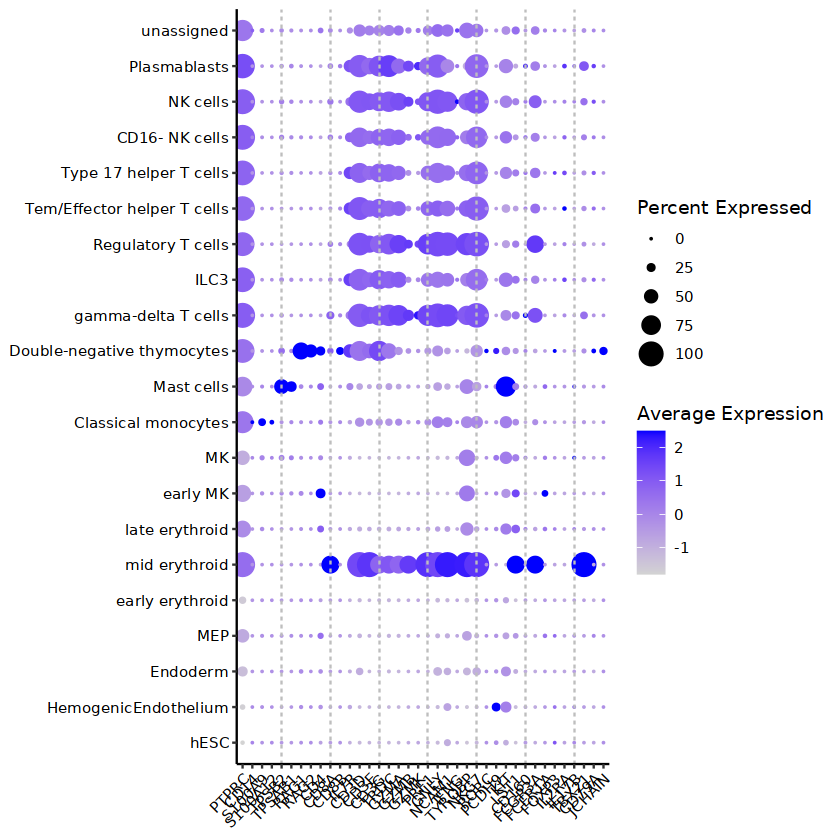

In [21]:
dotplot3<-DotPlot(
  adata,
  features=new_markers,
  assay = "SCT",
    group.by="Construction_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Construction_annotation_NEW_MARKERS.png', width =1000)
dotplot3
dev.off()

In [22]:
summary(adata@meta.data$Diff)

Diff_MK Diff_lymph 
      8292       8557

# Stacked barplot of genotypes across cell types Diff_MK

In [23]:
adata_sub<-subset(adata, Diff == 'Diff_MK')


In [24]:
met<-droplevels(adata_sub[[]])

In [25]:
met.dt<-data.table(met,key=c("time_point","Construction_annotation","clone_line","Diff"))

In [26]:
#str(met.dt)

In [27]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	194 obs. of  5 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_MK": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...


In [28]:
met.dt<-data.table(met, key=c("time_point","Construction_annotation","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	30 obs. of  4 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 2 2 2 2 3 3 3 3 3 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 5 15 2 3 4 5 6 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_MK": 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTAL                  : int  2240 61 48 9 10 1 721 405 329 31 ...


In [29]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","Construction_annotation","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [30]:
str(Freq.table)

'data.frame':	194 obs. of  7 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_MK": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...
 $ TOTAL                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...
 $ Perc                   : num  1.34 2.05 1.74 2.68 2.19 ...


In [31]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	4 obs. of  3 variables:
 $ time_point: Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 2 3 4
 $ Diff      : Ord.factor w/ 1 level "Diff_MK": 1 1 1 1
 $ ntime     : int  2240 128 1885 4039


In [32]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	194 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_MK": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...
 $ TOTAL                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...
 $ Perc                   : num  1.34 2.05 1.74 2.68 2.19 ...
 $ ntime                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...


In [33]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

'data.frame':	194 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_MK": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...
 $ TOTAL                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...
 $ Perc                   : num  1.34 2.05 1.74 2.68 2.19 ...
 $ ntime                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...


In [34]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

In [35]:
str(Freq.table_filtered)

'data.frame':	194 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_MK": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...
 $ TOTAL                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...
 $ Perc                   : num  1.34 2.05 1.74 2.68 2.19 ...
 $ ntime                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...


In [36]:
met.dt<-data.table(met, key=c("clone_line"))
Freq.clone_line<-as.data.frame(met.dt[,.(ncloneline=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.clone_line)

'data.frame':	12 obs. of  2 variables:
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ncloneline: int  63 93 148 459 397 4196 605 62 673 906 ...


-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


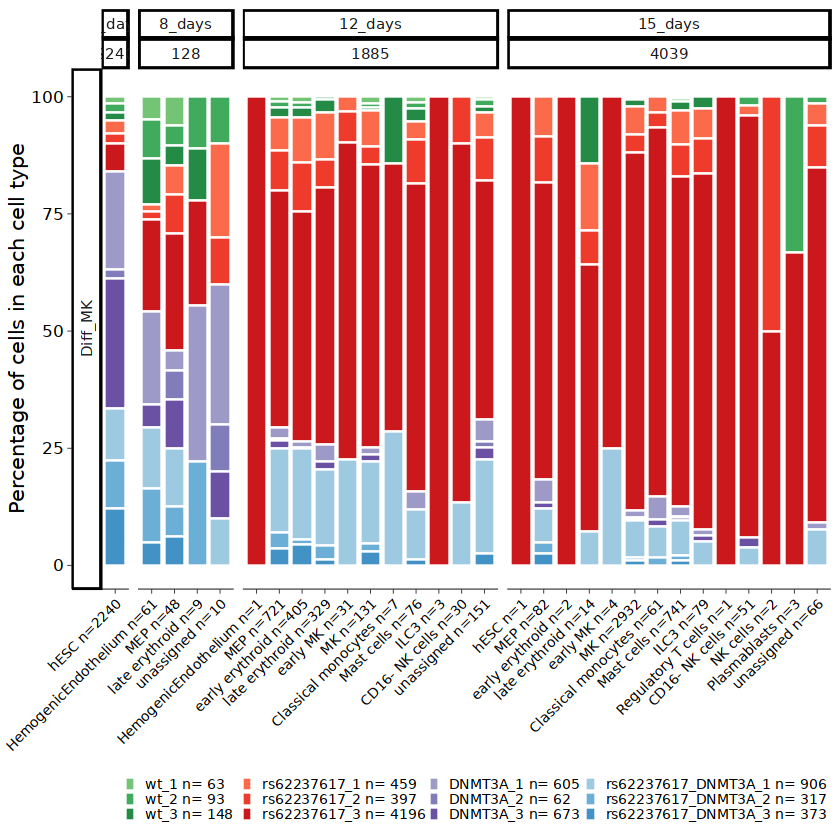

In [37]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(Construction_annotation, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(Construction_annotation)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="clone line",
                     breaks=Freq.clone_line$clone_line,
                     labels=paste(Freq.clone_line$clone_line," n= ",Freq.clone_line$ncloneline, sep=''))

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Construction_annotation", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [38]:
setwd(path_graphs)

svgname<-paste("stacked_barplot_Diff_MK_vs_time_point_Construction_annotation_vs_clone_line_only_genotyped_cells",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png",
        width=10, height=7)
}

# Stacked barplot of genotypes across cell types Diff_lymph

In [39]:
adata_sub<-subset(adata, Diff == 'Diff_lymph')


In [40]:
met<-droplevels(adata_sub[[]])

In [41]:
met.dt<-data.table(met,key=c("time_point","Construction_annotation","clone_line","Diff"))

In [42]:
#str(met.dt)

In [43]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	203 obs. of  5 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 1 1 2 2 2 2 2 2 2 2 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 8 12 1 2 3 4 5 6 7 8 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_lymph": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                   : int  3 1 12 66 17 17 47 9 28 530 ...


In [44]:
met.dt<-data.table(met, key=c("time_point","Construction_annotation","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	50 obs. of  4 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 6 7 8 9 12 16 18 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_lymph": 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTAL                  : int  4 915 72 108 74 44 15 19 7 3 ...


In [45]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","Construction_annotation","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [46]:
str(Freq.table)

'data.frame':	203 obs. of  7 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 16 16 16 16 16 16 8 8 8 8 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_lymph": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 2 5 6 8 9 11 2 3 4 5 ...
 $ Freq                   : int  1 1 1 2 1 1 1 5 2 5 ...
 $ TOTAL                  : int  7 7 7 7 7 7 44 44 44 44 ...
 $ Perc                   : num  14.3 14.3 14.3 28.6 14.3 ...


In [47]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	4 obs. of  3 variables:
 $ time_point: Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 2 3 4
 $ Diff      : Ord.factor w/ 1 level "Diff_lymph": 1 1 1 1
 $ ntime     : int  1315 2758 1277 3207


In [48]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	203 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_lymph": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 16 16 16 16 16 16 8 8 8 8 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 2 5 6 8 9 11 2 3 4 5 ...
 $ Freq                   : int  1 1 1 2 1 1 1 5 2 5 ...
 $ TOTAL                  : int  7 7 7 7 7 7 44 44 44 44 ...
 $ Perc                   : num  14.3 14.3 14.3 28.6 14.3 ...
 $ ntime                  : int  1315 1315 1315 1315 1315 1315 1315 1315 1315 1315 ...


In [49]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

'data.frame':	203 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_lymph": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 16 16 16 16 16 16 8 8 8 8 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 2 5 6 8 9 11 2 3 4 5 ...
 $ Freq                   : int  1 1 1 2 1 1 1 5 2 5 ...
 $ TOTAL                  : int  7 7 7 7 7 7 44 44 44 44 ...
 $ Perc                   : num  14.3 14.3 14.3 28.6 14.3 ...
 $ ntime                  : int  1315 1315 1315 1315 1315 1315 1315 1315 1315 1315 ...


In [50]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

In [51]:
str(Freq.table_filtered)

'data.frame':	203 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : Ord.factor w/ 1 level "Diff_lymph": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 16 16 16 16 16 16 8 8 8 8 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 2 5 6 8 9 11 2 3 4 5 ...
 $ Freq                   : int  1 1 1 2 1 1 1 5 2 5 ...
 $ TOTAL                  : int  7 7 7 7 7 7 44 44 44 44 ...
 $ Perc                   : num  14.3 14.3 14.3 28.6 14.3 ...
 $ ntime                  : int  1315 1315 1315 1315 1315 1315 1315 1315 1315 1315 ...


In [52]:
met.dt<-data.table(met, key=c("clone_line"))
Freq.clone_line<-as.data.frame(met.dt[,.(ncloneline=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.clone_line)

'data.frame':	12 obs. of  2 variables:
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ncloneline: int  24 98 40 796 3855 2688 61 761 46 25 ...


-------------------------------------->	0 25 50 75 100


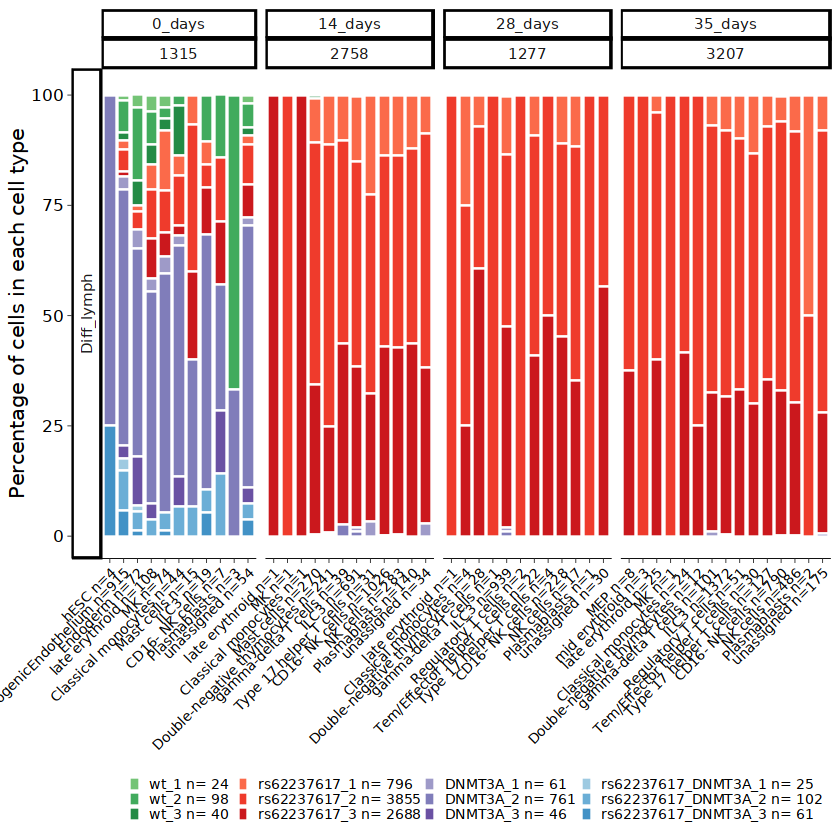

In [53]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(Construction_annotation, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(Construction_annotation)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="clone line",
                     breaks=Freq.clone_line$clone_line,
                     labels=paste(Freq.clone_line$clone_line," n= ",Freq.clone_line$ncloneline, sep=''))

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Construction_annotation", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [54]:
setwd(path_graphs)

svgname<-paste("stacked_barplot_Diff_lymph_vs_time_point_Construction_annotation_vs_clone_line_only_genotyped_cells",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png",
        width=10, height=7)
}

# RPCA integration results

## Read objects merged_unprocessed_db_filt_clustered_QCed

In [55]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [58]:
adata_RPCA<-readRDS(file="merged_clusters_final_with_peak_subset_rpca_integrate_clustered_on_SCT.rds")

# merged_clusters_final.rds

In [59]:
adata_RPCA

An object of class Seurat 
971743 features across 16849 samples within 7 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 6 other assays present: RNA, RNA_raw, ATAC, SCT, ATAC_by_Construction_annotation, peak_subset
 2 dimensional reductions calculated: pca, umap

In [71]:
str(adata_RPCA@meta.data)

'data.frame':	16849 obs. of  84 variables:
 $ orig.ident                              : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                              : num  10351 9684 8467 23092 22503 ...
 $ nFeature_RNA                            : int  4753 4688 4336 6960 7031 6042 5750 5814 5221 5281 ...
 $ percent.mt                              : num  0.473 0.434 0.591 0.611 1.44 ...
 $ nCount_RNA_raw                          : num  11643 11274 9855 23863 23265 ...
 $ nFeature_RNA_raw                        : int  4772 4715 4383 6963 7032 6050 5761 5826 5580 5315 ...
 $ nCount_ATAC                             : num  29946 54272 64472 40030 141138 ...
 $ nFeature_ATAC                           : int  7431 12915 15158 9850 31543 24916 29054 15567 30931 7240 ...
 $ gex_raw_reads                           : int  23298 21620 19452 48530 46234 37825 31044 31886 32599 27728 ...
 $ gex_mapped_reads                        : int  22654 20952 18917 47182 44973 36744 302

In [72]:
adata_RPCA@meta.data$time_point<-factor(adata_RPCA@meta.data$time_point, levels=levels(adata@meta.data$time_point), ordered=T)
adata_RPCA@meta.data$clone_line<-factor(adata_RPCA@meta.data$clone_line, levels=levels(adata@meta.data$clone_line), ordered=T)
adata_RPCA@meta.data$Genotype<-factor(adata_RPCA@meta.data$Genotype, levels=levels(adata@meta.data$Genotype), ordered=T)
adata_RPCA@meta.data$Construction_annotation<-factor(adata_RPCA@meta.data$Construction_annotation, levels=levels(adata@meta.data$Construction_annotation), ordered=T)



## RPCA path

In [73]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/",'RPCA_graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

NULL

### Graph UMAP by SampleID

png 
  2

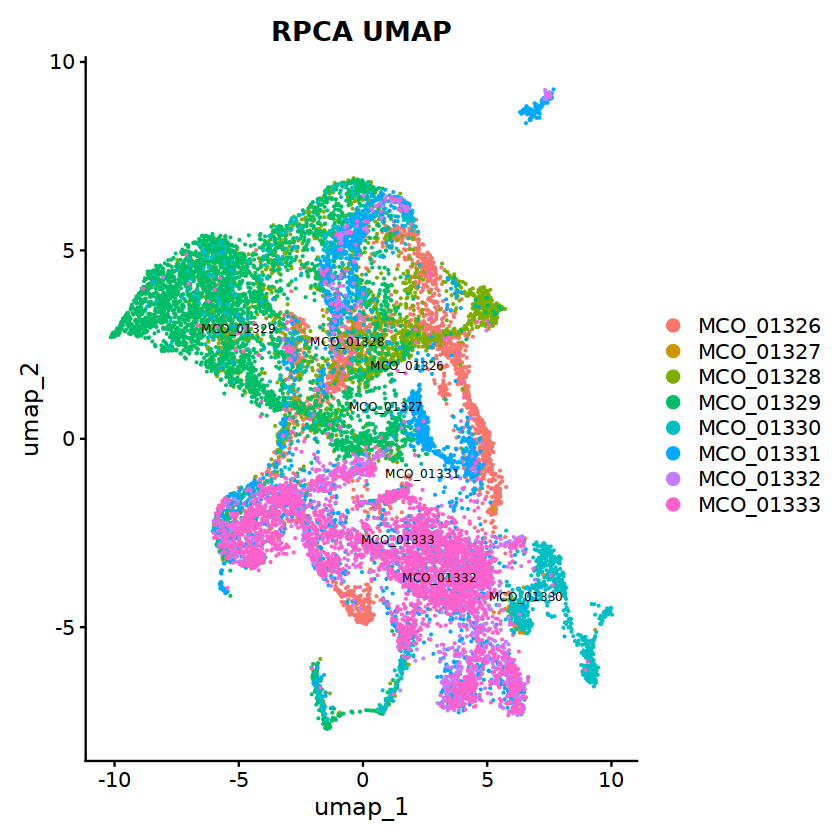

In [74]:
p3 <- DimPlot(adata_RPCA, reduction = "umap", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("RPCA UMAP")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='UMAP_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

### Graph UMAP by Seurat cluster

png 
  2

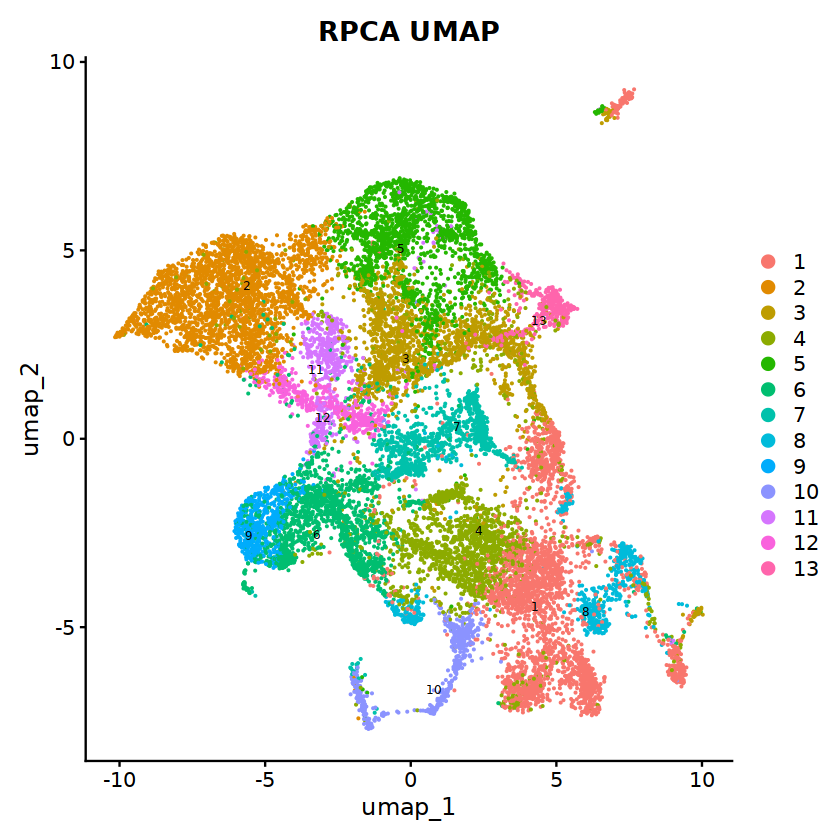

In [75]:
p3 <- DimPlot(adata_RPCA, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("RPCA UMAP")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='UMAP_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

### UMAP by Construction_annotation

In [76]:
levels(adata_RPCA@meta.data$Construction_annotation)

length(levels(adata_RPCA@meta.data$Construction_annotation))

[1] "hESC"                        "HemogenicEndothelium"       
 [3] "Endoderm"                    "MEP"                        
 [5] "early erythroid"             "mid erythroid"              
 [7] "late erythroid"              "early MK"                   
 [9] "MK"                          "Classical monocytes"        
[11] "Mast cells"                  "Double-negative thymocytes" 
[13] "gamma-delta T cells"         "ILC3"                       
[15] "Regulatory T cells"          "Tem/Effector helper T cells"
[17] "Type 17 helper T cells"      "CD16- NK cells"             
[19] "NK cells"                    "Plasmablasts"               
[21] "unassigned"

[1] 21

In [77]:
vector_colors<-c('#E41A1C','#377EB8','#8DD3C7','#4DAF4A','#984EA3','#FF7F00','#FFFF33','#F781BF','yellowgreen','#C7E9C0','#08519C','#FB6A4A','#EF3B2C','#CB181D','#A50F15','#67000D','#FFF5F0',
                '#FDAE6B','#D94801','#FCBBA1','gray')

str(vector_colors)
cat("\n")

names(vector_colors)<-levels(adata_RPCA@meta.data$Construction_annotation)

str(vector_colors)
cat("\n")

 chr [1:21] "#E41A1C" "#377EB8" "#8DD3C7" "#4DAF4A" "#984EA3" "#FF7F00" ...

 Named chr [1:21] "#E41A1C" "#377EB8" "#8DD3C7" "#4DAF4A" "#984EA3" ...
 - attr(*, "names")= chr [1:21] "hESC" "HemogenicEndothelium" "Endoderm" "MEP" ...



Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


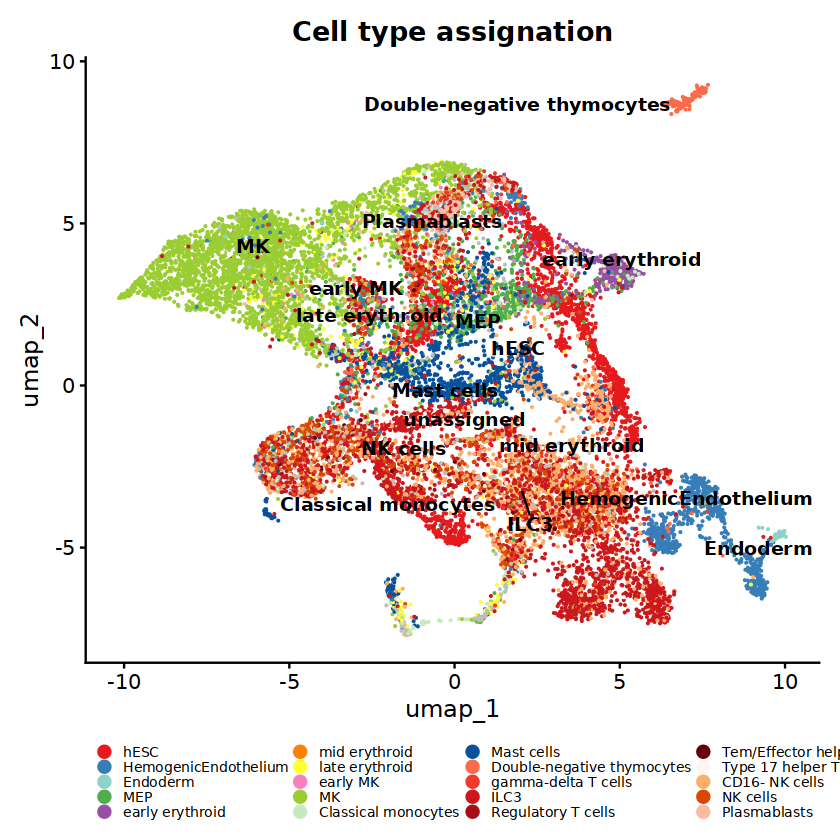

In [78]:
p3 <- DimPlot(adata_RPCA, reduction = "umap", group.by = "Construction_annotation", label = FALSE, cols=vector_colors) 

p3<-LabelClusters(p3, id = "Construction_annotation",  fontface = "bold", color = "black")+
ggtitle("Cell type assignation")+
theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))

p3


In [80]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='UMAP_by_Construction_annotation.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


png 
  2

### UMAP markers

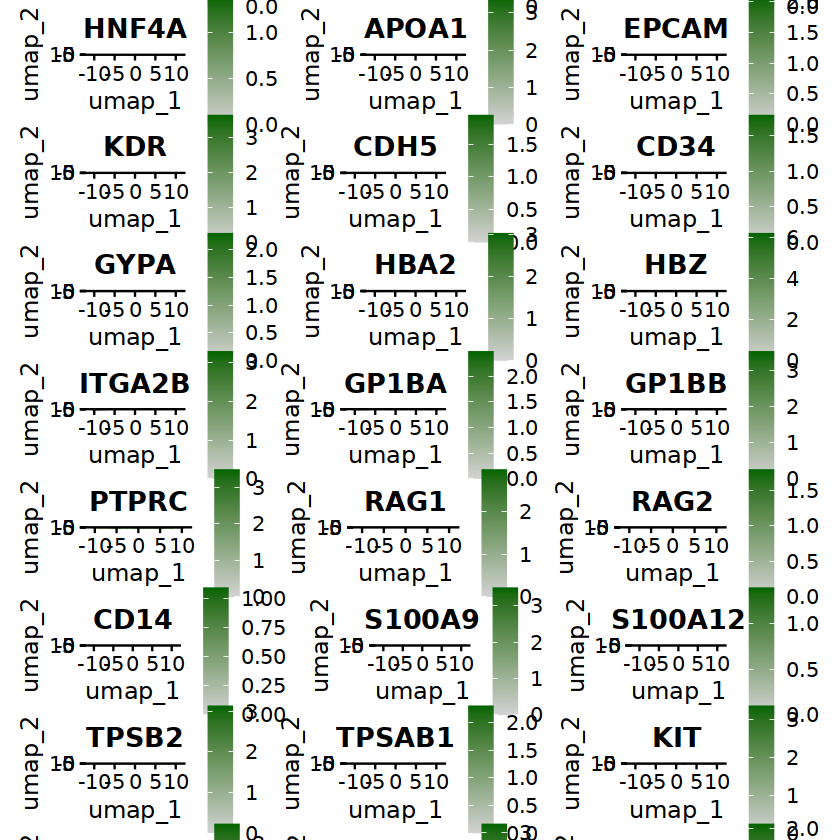

In [82]:
## Graph 

DefaultAssay(adata_RPCA) <- 'SCT'


p5 <- FeaturePlot(adata_RPCA, features = c('SOX2','SOX4','POU5F1'),
                  reduction = 'umap', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

pEndoderm <- FeaturePlot(adata_RPCA, features = c("HNF4A",'APOA1','EPCAM'),
                  reduction = 'umap', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

p5_B <- FeaturePlot(adata_RPCA, features = c("KDR",'CDH5','CD34'),
                  reduction = 'umap', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)
p5_1 <- FeaturePlot(adata_RPCA, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata_RPCA, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata_RPCA, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(adata_RPCA, features = c('PTPRC','RAG1','RAG2'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_8 <- FeaturePlot(adata_RPCA, features = c('CD14','S100A9','S100A12'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_9 <- FeaturePlot(adata_RPCA, features = c('TPSB2','TPSAB1','KIT'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_10 <- FeaturePlot(adata_RPCA, features = c('NCAM1','NKG7','FCGR3A'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5 / pEndoderm / p5_B / p5_1 / p5_3 / p_7 / p_8/ p_9 / p_10

In [83]:
setwd(path_graphs)
png(file='UMAP_marker_genes.png', width =1000, height = 2250)
p5 / pEndoderm / p5_B / p5_1 / p5_3 / p_7 / p_8/ p_9 / p_10
dev.off()

png 
  2

## Define marker genes

In [84]:
markers<-c('SOX2','SOX4','POU5F1',"HNF4A","APOA1","EPCAM","KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

In [85]:
length(markers)

[1] 30

### Dotplot

png 
  2

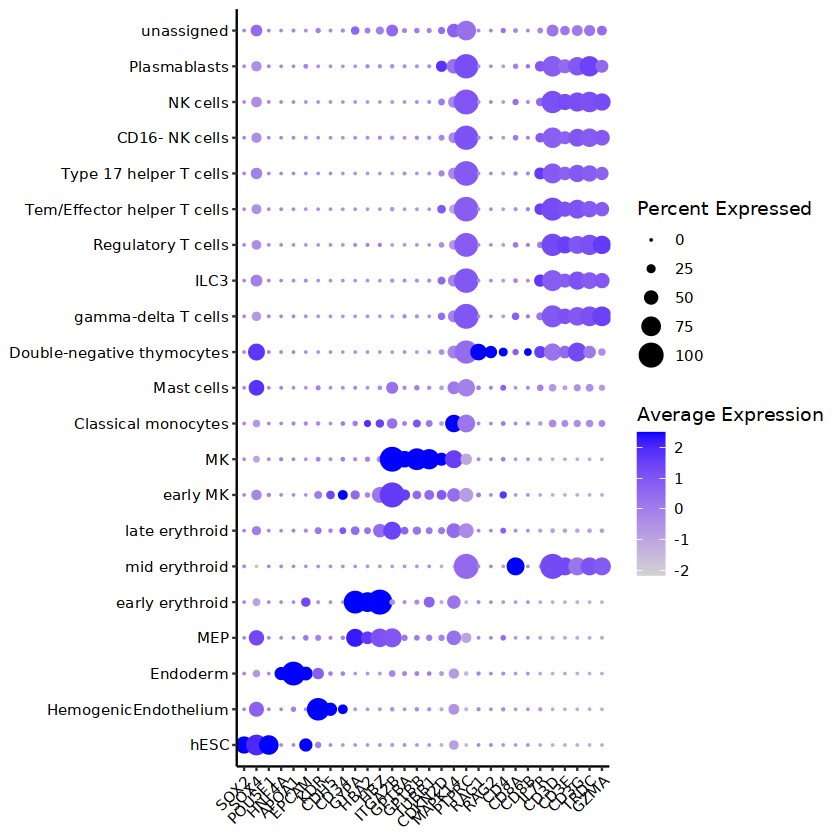

In [86]:
dotplot3<-DotPlot(
  adata_RPCA,
  features=markers,
  assay = "SCT",
    group.by="Construction_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Construction_annotation.png', width =1000)
dotplot3
dev.off()

## New markers

In [87]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

png 
  2

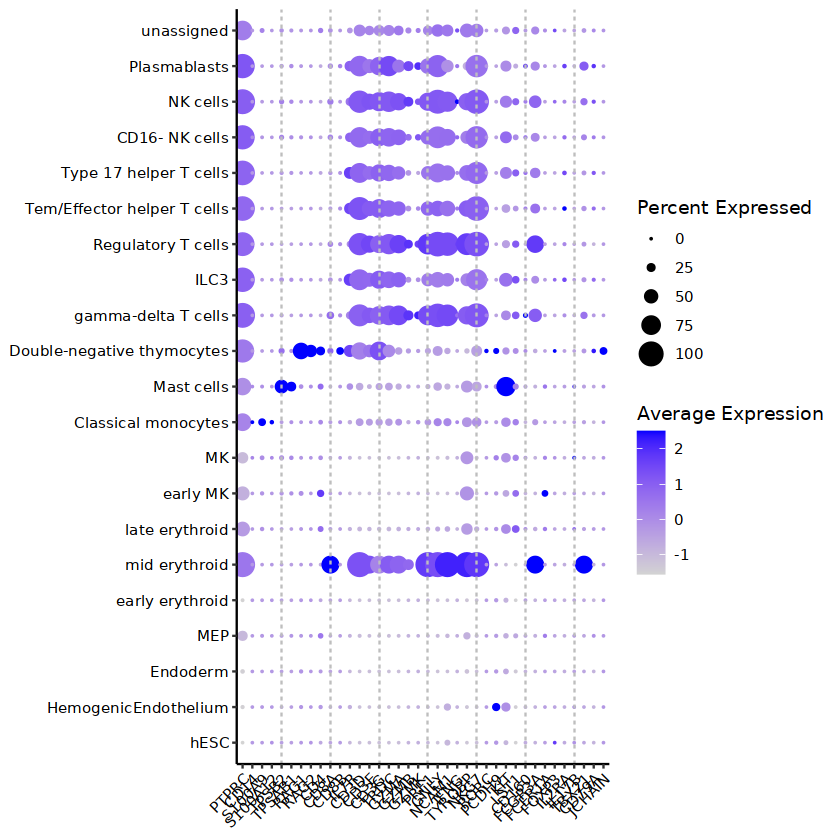

In [88]:
dotplot3<-DotPlot(
  adata_RPCA,
  features=new_markers,
  assay = "SCT",
    group.by="Construction_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Construction_annotation_NEW_MARKERS.png', width =1000)
dotplot3
dev.off()

In [89]:
summary(adata_RPCA@meta.data$Diff)

   Length     Class      Mode 
    16849 character character 

## Stacked barplot of genotypes across cell types Diff_MK

In [90]:
adata_RPCA_sub<-subset(adata_RPCA, Diff == 'Diff_MK')


In [91]:
met<-droplevels(adata_RPCA_sub[[]])

In [92]:
met.dt<-data.table(met,key=c("time_point","Construction_annotation","clone_line","Diff"))

In [93]:
#str(met.dt)

In [94]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	194 obs. of  5 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Diff                   : chr  "Diff_MK" "Diff_MK" "Diff_MK" "Diff_MK" ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...


In [95]:
met.dt<-data.table(met, key=c("time_point","Construction_annotation","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	30 obs. of  4 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 2 2 2 2 3 3 3 3 3 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 5 15 2 3 4 5 6 ...
 $ Diff                   : chr  "Diff_MK" "Diff_MK" "Diff_MK" "Diff_MK" ...
 $ TOTAL                  : int  2240 61 48 9 10 1 721 405 329 31 ...


In [96]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","Construction_annotation","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [97]:
str(Freq.table)

'data.frame':	194 obs. of  7 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : chr  "Diff_MK" "Diff_MK" "Diff_MK" "Diff_MK" ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...
 $ TOTAL                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...
 $ Perc                   : num  1.34 2.05 1.74 2.68 2.19 ...


In [98]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	4 obs. of  3 variables:
 $ time_point: Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 2 3 4
 $ Diff      : chr  "Diff_MK" "Diff_MK" "Diff_MK" "Diff_MK"
 $ ntime     : int  2240 128 1885 4039


In [99]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	194 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : chr  "Diff_MK" "Diff_MK" "Diff_MK" "Diff_MK" ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...
 $ TOTAL                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...
 $ Perc                   : num  1.34 2.05 1.74 2.68 2.19 ...
 $ ntime                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...


In [100]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

'data.frame':	194 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : chr  "Diff_MK" "Diff_MK" "Diff_MK" "Diff_MK" ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...
 $ TOTAL                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...
 $ Perc                   : num  1.34 2.05 1.74 2.68 2.19 ...
 $ ntime                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...


In [101]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

In [102]:
str(Freq.table_filtered)

'data.frame':	194 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"8_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : chr  "Diff_MK" "Diff_MK" "Diff_MK" "Diff_MK" ...
 $ Construction_annotation: Ord.factor w/ 15 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                   : int  30 46 39 60 49 131 469 46 619 248 ...
 $ TOTAL                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...
 $ Perc                   : num  1.34 2.05 1.74 2.68 2.19 ...
 $ ntime                  : int  2240 2240 2240 2240 2240 2240 2240 2240 2240 2240 ...


In [103]:
met.dt<-data.table(met, key=c("clone_line"))
Freq.clone_line<-as.data.frame(met.dt[,.(ncloneline=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.clone_line)

'data.frame':	12 obs. of  2 variables:
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ncloneline: int  63 93 148 459 397 4196 605 62 673 906 ...


-------------------------------------->	0 25 50 75 100


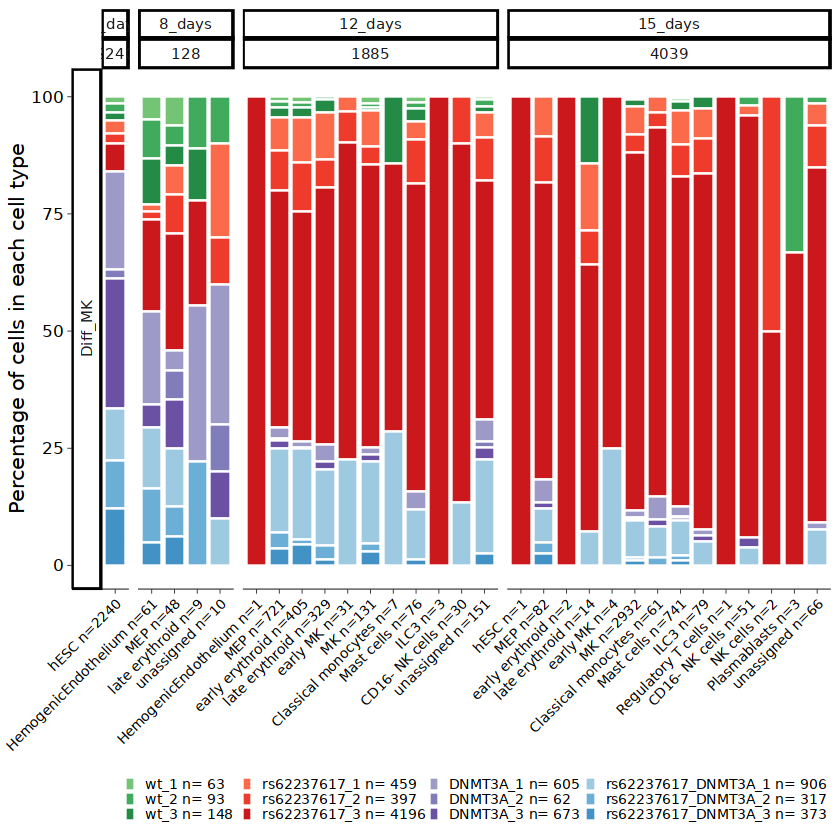

In [104]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(Construction_annotation, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(Construction_annotation)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="clone line",
                     breaks=Freq.clone_line$clone_line,
                     labels=paste(Freq.clone_line$clone_line," n= ",Freq.clone_line$ncloneline, sep=''))

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Construction_annotation", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [105]:
setwd(path_graphs)

svgname<-paste("stacked_barplot_Diff_MK_vs_time_point_Construction_annotation_vs_clone_line_only_genotyped_cells",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png",
        width=10, height=7)
}

## Stacked barplot of genotypes across cell types Diff_lymph

In [106]:
adata_RPCA_sub<-subset(adata_RPCA, Diff == 'Diff_lymph')


In [107]:
met<-droplevels(adata_RPCA_sub[[]])

In [108]:
met.dt<-data.table(met,key=c("time_point","Construction_annotation","clone_line","Diff"))

In [109]:
#str(met.dt)

In [110]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	203 obs. of  5 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 1 1 2 2 2 2 2 2 2 2 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 8 12 1 2 3 4 5 6 7 8 ...
 $ Diff                   : chr  "Diff_lymph" "Diff_lymph" "Diff_lymph" "Diff_lymph" ...
 $ Freq                   : int  3 1 12 66 17 17 47 9 28 530 ...


In [111]:
met.dt<-data.table(met, key=c("time_point","Construction_annotation","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	50 obs. of  4 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 6 7 8 9 12 16 18 ...
 $ Diff                   : chr  "Diff_lymph" "Diff_lymph" "Diff_lymph" "Diff_lymph" ...
 $ TOTAL                  : int  4 915 72 108 74 44 15 19 7 3 ...


In [112]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","Construction_annotation","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [113]:
str(Freq.table)

'data.frame':	203 obs. of  7 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 16 16 16 16 16 16 8 8 8 8 ...
 $ Diff                   : chr  "Diff_lymph" "Diff_lymph" "Diff_lymph" "Diff_lymph" ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 2 5 6 8 9 11 2 3 4 5 ...
 $ Freq                   : int  1 1 1 2 1 1 1 5 2 5 ...
 $ TOTAL                  : int  7 7 7 7 7 7 44 44 44 44 ...
 $ Perc                   : num  14.3 14.3 14.3 28.6 14.3 ...


In [114]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	4 obs. of  3 variables:
 $ time_point: Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 2 3 4
 $ Diff      : chr  "Diff_lymph" "Diff_lymph" "Diff_lymph" "Diff_lymph"
 $ ntime     : int  1315 2758 1277 3207


In [115]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	203 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : chr  "Diff_lymph" "Diff_lymph" "Diff_lymph" "Diff_lymph" ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 16 16 16 16 16 16 8 8 8 8 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 2 5 6 8 9 11 2 3 4 5 ...
 $ Freq                   : int  1 1 1 2 1 1 1 5 2 5 ...
 $ TOTAL                  : int  7 7 7 7 7 7 44 44 44 44 ...
 $ Perc                   : num  14.3 14.3 14.3 28.6 14.3 ...
 $ ntime                  : int  1315 1315 1315 1315 1315 1315 1315 1315 1315 1315 ...


In [116]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

'data.frame':	203 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : chr  "Diff_lymph" "Diff_lymph" "Diff_lymph" "Diff_lymph" ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 16 16 16 16 16 16 8 8 8 8 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 2 5 6 8 9 11 2 3 4 5 ...
 $ Freq                   : int  1 1 1 2 1 1 1 5 2 5 ...
 $ TOTAL                  : int  7 7 7 7 7 7 44 44 44 44 ...
 $ Perc                   : num  14.3 14.3 14.3 28.6 14.3 ...
 $ ntime                  : int  1315 1315 1315 1315 1315 1315 1315 1315 1315 1315 ...


In [117]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

In [118]:
str(Freq.table_filtered)

'data.frame':	203 obs. of  8 variables:
 $ time_point             : Ord.factor w/ 4 levels "0_days"<"14_days"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                   : chr  "Diff_lymph" "Diff_lymph" "Diff_lymph" "Diff_lymph" ...
 $ Construction_annotation: Ord.factor w/ 19 levels "hESC"<"HemogenicEndothelium"<..: 16 16 16 16 16 16 8 8 8 8 ...
 $ clone_line             : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 2 5 6 8 9 11 2 3 4 5 ...
 $ Freq                   : int  1 1 1 2 1 1 1 5 2 5 ...
 $ TOTAL                  : int  7 7 7 7 7 7 44 44 44 44 ...
 $ Perc                   : num  14.3 14.3 14.3 28.6 14.3 ...
 $ ntime                  : int  1315 1315 1315 1315 1315 1315 1315 1315 1315 1315 ...


In [119]:
met.dt<-data.table(met, key=c("clone_line"))
Freq.clone_line<-as.data.frame(met.dt[,.(ncloneline=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.clone_line)

'data.frame':	12 obs. of  2 variables:
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ncloneline: int  24 98 40 796 3855 2688 61 761 46 25 ...


-------------------------------------->	0 25 50 75 100


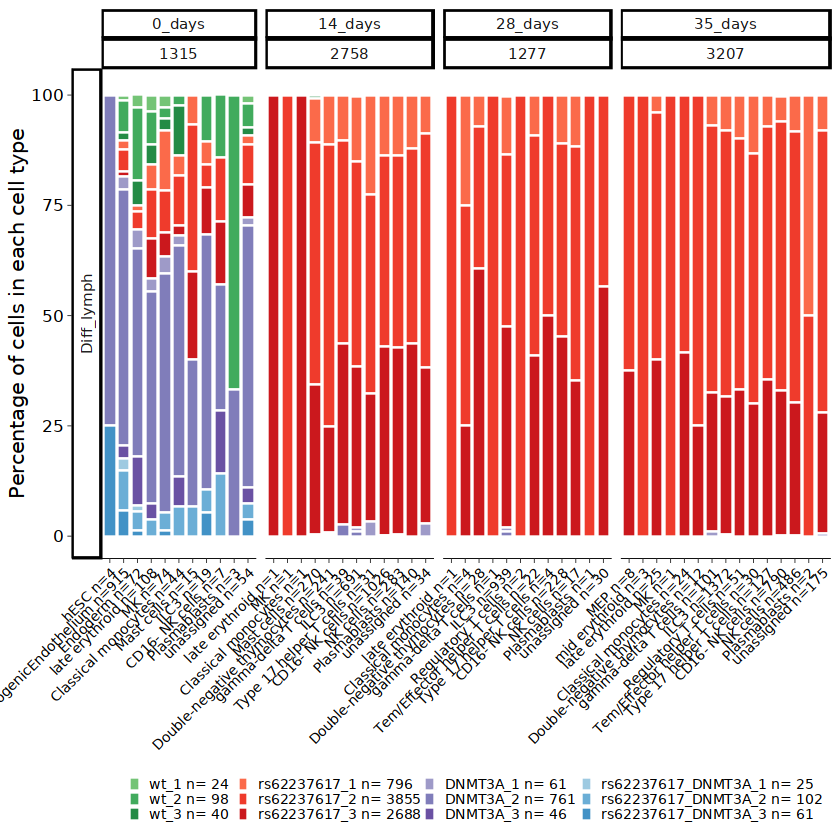

In [120]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(Construction_annotation, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(Construction_annotation)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="clone line",
                     breaks=Freq.clone_line$clone_line,
                     labels=paste(Freq.clone_line$clone_line," n= ",Freq.clone_line$ncloneline, sep=''))

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Construction_annotation", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [121]:
setwd(path_graphs)

svgname<-paste("stacked_barplot_Diff_lymph_vs_time_point_Construction_annotation_vs_clone_line_only_genotyped_cells",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png",
        width=10, height=7)
}